# STAT 207 Lab 9 - Group Part - [5 total points]

## Inference for Mean Differences and Proportion Differences

Due: Wednesday, March 30 11:59pm CST

## Testing for Associations in the Global 2021 Billionaire Population

In this lab, we will return to the 2021 global billionaire dataset. We will assume that the dataset in the **Billionaire.csv** represents our population of interest. However, as we discussed, in most cases of inference we will not actually have access to this full population of data. The purpose of conducting inference is to use random samples from an unattainable population of data to make an inference about some unknown population parameter.

However, for the sake of parts of this lab, again we will work with the actual population of data to gain a deeper understanding of the properties of inference. 

## Research Goals

In this group lab we have the following research goals.

1. Create an *actual* sampling distribution of sample mean differences (that will correspond to the theoretical one that we utilized in the individual lab).
2. Analyze this *actual* sampling distribution.


### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. [0.5 pt] Data Processing and Cleaning

Read the **Billionaire.csv** file into a dataframe. 

This dataframe has some missing values in the age column! However, we are in luck! The missing values in this csv file are encoded as 'N/A'. Luckily, the string 'N/A' is a string that the **pd.read_csv()** function automatically knows represents a missing value. So it will automatically turn these string values into a **NaN** value (whether you specify this with the **missing_values** parameter or not) and therefore not cause your numerical variable datatypes to be read as strings in this particular example.

You should drop all rows with missing values.

In [2]:
Bill = pd.read_csv('Billionaire.csv')
Bill.head()

,Name,NetWorth_billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [4]:
df = Bill.dropna()
df.head()

,Name,NetWorth_billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


## 2. [0.5 pt] Two Populations of Tech and Non-Tech Billionaires

In this analysis, we will consider two populations:
* the population of billionaires that work in tech
* the population of billionaires that do not work in tech

Create two dataframes:
* one that is comprised of the tech industry billionaires
* one that is comprised of the non-tech industry billionaires

In [5]:
tech = df[df['Industry'] == 'Technology']
tech.head()

,Name,NetWorth_billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology


In [6]:
nontech = df[df['Industry'] != 'Technology']
nontech.head()

,Name,NetWorth_billions,Country,Source,Rank,Age,Industry
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified
10,Amancio Ortega,77.0,Spain,Zara,11,85.0,Fashion & Retail


## 3. [3 pt] *Actual* Sampling Distribution of Sample Mean Differences

Below you should create an *actual* sampling distribution of sample mean differences (ie. values for $\bar{x}_{tech}-\bar{x}_{nontech}$) with the following specifications.

1. Let $\bar{x}_{tech}$ be the mean age of a random sample of 31 tech billionaires from the population of 2021 tech billionaires.
2. Let $\bar{x}_{nontech}$ be the mean age of a random sample of 40 tech billionaires from the population of 2021 tech billionaires.
3. Your sampling distribution should be comprised of 1000 sample mean differences (ie. values for $\bar{x}_{tech}-\bar{x}_{nontech}$).

In [13]:
data=[]
for i in range(1000):
    diff = tech.sample(31, replace = True).Age.mean() - nontech.sample(40, replace = True).Age.mean()
    a={'DIFF':diff}
    data.append(a)
result = pd.DataFrame(data)

In [14]:
result

,DIFF
0,-5.811290
1,-10.826613
2,-16.728226
3,-6.896774
4,-8.944355
...,...
995,-10.827419
996,-14.625000
997,-6.368548
998,-7.058871


## 4. Sampling Distribution Properties

### 4.1. [0.5 pt] Mean and Standard Deviation
Calculate the *actual* mean and the standard deviation of this *actual* sampling distribution of sample mean differences that you created above

In [15]:
result.DIFF.mean()

-9.65088467741935

In [16]:
result.DIFF.std()

3.079489408316937

### 4.2. [0.5 pt] Sampling Distribution Shape

Plot this sampling distribution of sample mean differences in a histogram. Make sure you appropriately label this plot.

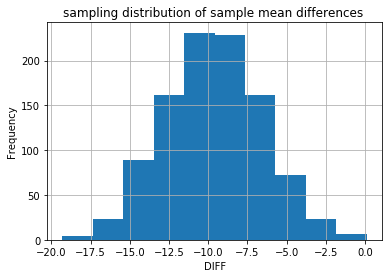

In [17]:
result.DIFF.hist()
plt.xlabel('DIFF')
plt.ylabel('Frequency')
plt.title('sampling distribution of sample mean differences ')
plt.show()

In [20]:
print('contribution: yuxuanm4 did 1,2 tianyih6 did 3,4')

contribution: yuxuanm4 did 1,2 tianyih6 did 3,4
